# **Task - 1 : Data cleaning and Preprocessing**

This notebook follows Task 1 instructions for preprocessing the Titanic dataset. Steps include handling null values, encoding, normalization, and outlier removal.

## **Step-1 : Importing Libraries**

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import zscore

## **Step-2 : Load the Dataset**

In [30]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic = pd.read_csv(url)

## **Step-3 : Dataset Overview**

In [34]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [40]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [88]:
titanic.shape

(871, 11)

## **Step 4: Feature Selection**
We dropped the following columns:
- `PassengerId`: Just an identifier.
- `Name`: Text column, complex to process.
- `Ticket`: Random strings.
- `Cabin`: Too many missing values.

These columns are not directly useful for modeling, hence removed.

In [44]:
titanic.drop(columns=['PassengerId','Name','Ticket','Cabin'], inplace=True)

In [46]:
titanic['Fare'] = titanic['Fare'].apply(lambda x: np.log(x+1) if x > 0 else 0)

## **Correaltion Heatmap**

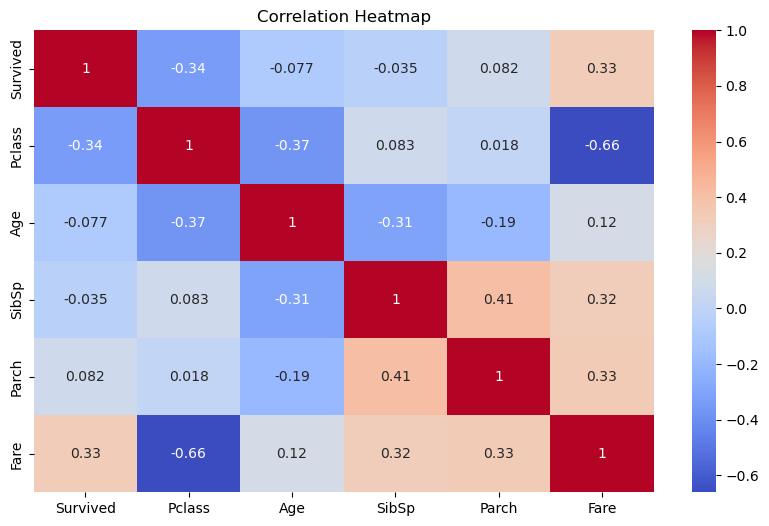

In [48]:
plt.figure(figsize=(10,6))
sns.heatmap(titanic.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## **Step-5 : Encoding Categorical Features**

In [50]:
numeric_col = ['Age','Fare']
categorical_col = ['Sex','Embarked', 'Pclass']

In [56]:
titanic_temp = titanic.copy()
for col in categorical_col:
    if col in titanic_temp.columns:
        titanic_temp[col] = titanic_temp[col].astype(str)
titanic_temp = pd.get_dummies(titanic_temp, drop_first=True)
imputer = KNNImputer(n_neighbors=3)
titanic_imputed = pd.DataFrame(imputer.fit_transform(titanic_temp), columns=titanic_temp.columns)

In [58]:
titanic[['Age', 'Fare']] = titanic_imputed[['Age', 'Fare']]

In [64]:
titanic_imputed

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Embarked_nan
0,0.0,22.0,1.0,0.0,2.110213,0.0,1.0,1.0,0.0,1.0,0.0
1,1.0,38.0,1.0,0.0,4.280593,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,26.0,0.0,0.0,2.188856,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,35.0,1.0,0.0,3.990834,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,35.0,0.0,0.0,2.202765,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,27.0,0.0,0.0,2.639057,1.0,0.0,1.0,0.0,1.0,0.0
887,1.0,19.0,0.0,0.0,3.433987,0.0,0.0,0.0,0.0,1.0,0.0
888,0.0,22.0,1.0,2.0,3.196630,0.0,1.0,0.0,0.0,1.0,0.0
889,1.0,26.0,0.0,0.0,3.433987,0.0,0.0,1.0,0.0,0.0,0.0


## **Step-6 : Visualize and remove outliers**

In [62]:
z_scores = np.abs(zscore(titanic[numeric_col]))
titanic = titanic[(z_scores < 3).all(axis=1)]

In [66]:
z_scores

,Age,Fare
0,0.550140,0.879741
1,0.572906,1.361220
2,0.269378,0.798540
3,0.362335,1.062038
4,0.362335,0.784179
...,...,...
886,0.199188,0.333698
887,0.760711,0.487082
888,0.550140,0.242007
889,0.269378,0.487082


In [72]:
for col in categorical_col:
    if col in titanic.columns:
        titanic[col] = titanic[col].astype(str)
titanic = pd.get_dummies(titanic, columns=[col for col in categorical_col if col in titanic.columns], drop_first=True)

In [76]:
scaler = StandardScaler()
titanic[numeric_col] = scaler.fit_transform(titanic[numeric_col])

In [100]:
z_scores = titanic[numeric_col].apply(zscore)
mask = (z_scores < 3).all(axis=1)
print("Rows before filtering:", titanic.shape[0])
print("Rows after filtering:", mask.sum())
titanic = titanic[mask]

Rows before filtering: 871
Rows after filtering: 871


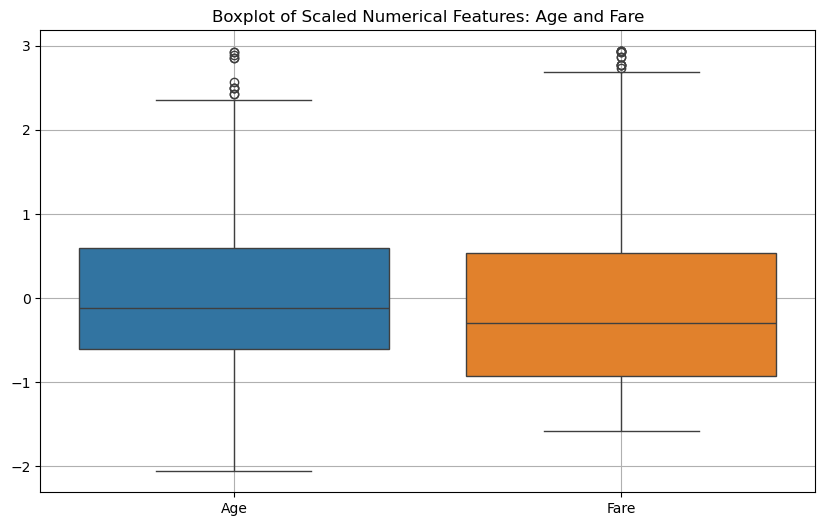

In [102]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=titanic[numeric_col])
plt.title("Boxplot of Scaled Numerical Features: Age and Fare")
plt.grid(True)
plt.show()

## **Step-7 : After cleaning - Heatmap**

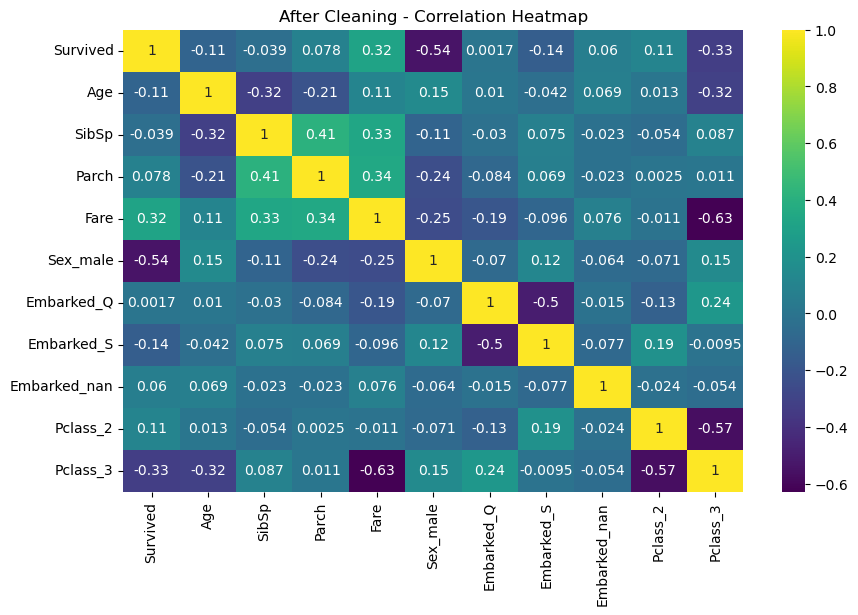

In [84]:
plt.figure(figsize=(10, 6))
sns.heatmap(titanic.corr(), annot=True, cmap="viridis")
plt.title("After Cleaning - Correlation Heatmap")
plt.show()

## **Step-8 : After cleaning and preprocessig**

In [86]:
print("Final Dataset Shape:", titanic.shape)
print("Final Columns:\n", titanic.columns.tolist())

Final Dataset Shape: (871, 11)
Final Columns:
 ['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Embarked_nan', 'Pclass_2', 'Pclass_3']
